# Objective

The objective of this data analysis project is to identify opportunities to increase occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.

Tech Stack : SQL, Python

# Importing Libraries

In [131]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Connecting Database

In [85]:
connection = sqlite3.connect('travel.sqlite')

In [86]:
table_list = pd.read_sql_query("select name from sqlite_master where type='table'",connection)
table_list

,name
0,aircrafts_data
1,airports_data
2,boarding_passes
3,bookings
4,flights
5,seats
6,ticket_flights
7,tickets


# Data Exploration

In [87]:
aircrafts_data = pd.read_sql_query('select * from aircrafts_data',connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [88]:
aircrafts_data.shape

(9, 3)

In [89]:
airports_data = pd.read_sql_query('select * from airports_data',connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [90]:
airports_data.shape

(104, 5)

In [91]:
boarding_passes = pd.read_sql_query('select * from boarding_passes',connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [92]:
boarding_passes.shape

(579686, 4)

In [93]:
bookings = pd.read_sql_query('select * from bookings',connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [94]:
bookings.shape

(262788, 3)

In [95]:
flights = pd.read_sql_query('select * from flights',connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [96]:
seats = pd.read_sql_query('select * from seats',connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [97]:
seats.shape

(1339, 3)

In [98]:
ticket_flights = pd.read_sql_query('select * from ticket_flights',connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [99]:
ticket_flights.shape

(1045726, 4)

In [100]:
tickets = pd.read_sql_query('select * from tickets',connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [101]:
tickets.shape

(366733, 3)

In [102]:
# getting the datatypes of the columns
for table in table_list['name']:
    print(f'\n\n{table}:\n')
    column_info = connection.execute(f"PRAGMA table_info({table})")
    for column in column_info.fetchall():
        print(column[1:3])



aircrafts_data:

('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')


airports_data:

('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')


boarding_passes:

('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')


bookings:

('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')


flights:

('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')


seats:

('aircraft_code', 'character(3)')
('seat_no', 'character varying(4)')
('fare_conditions', 

In [103]:
# checking for missing values
for table in table_list['name']:
    print(f'\n{table}:')
    df = pd.read_sql_query(f'select * from {table}',connection)
    print(df.isna().sum())


aircrafts_data:
aircraft_code    0
model            0
range            0
dtype: int64

airports_data:
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

boarding_passes:
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

bookings:
book_ref        0
book_date       0
total_amount    0
dtype: int64

flights:
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

seats:
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

ticket_flights:
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

tickets:
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis

How many planes have more than 100 seats?

In [104]:
pd.read_sql_query("""select aircraft_code, count(seat_no) as seats 
                    from seats group by aircraft_code having seats>100""", connection)

,aircraft_code,seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


Hence, there are 6 planes having more than 100 seats.

How the number of tickets booked and total amount earned changed with the time?

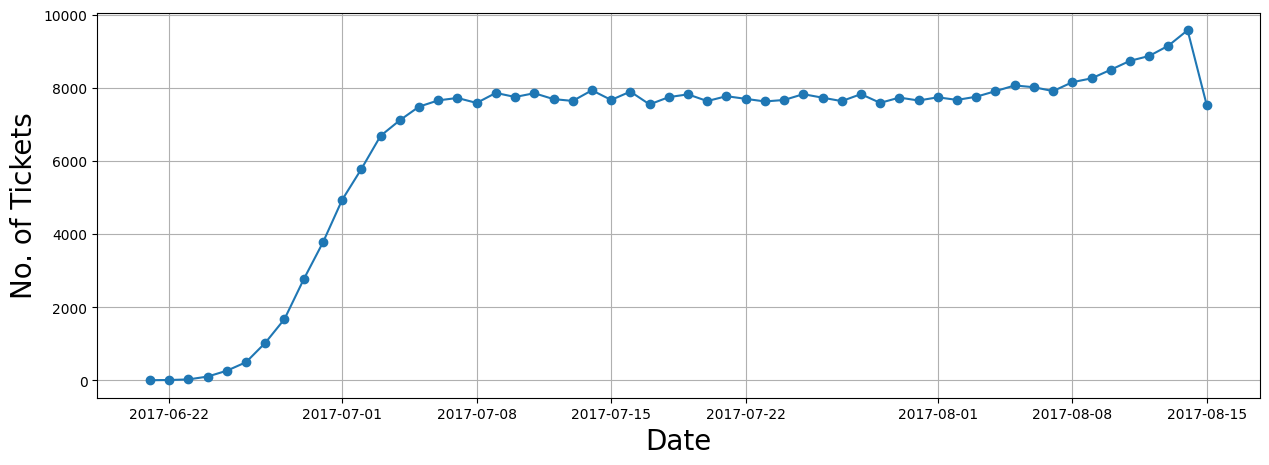

In [121]:
tickets = pd.read_sql_query("""select * from bookings b inner join tickets t on b.book_ref=t.book_ref""",connection)
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date']=tickets['book_date'].dt.date
x = tickets.groupby('date')[['ticket_no']].count()
plt.figure(figsize=(15,5))
plt.plot(x.index,x['ticket_no'],marker='o')
plt.xlabel('Date',fontsize=20)
plt.ylabel('No. of Tickets',fontsize=20)
plt.grid('b')
plt.show()

In [122]:
bookings = pd.read_sql_query("""select * from bookings""",connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date']=bookings['book_date'].dt.date
x = bookings.groupby('date')[['total_amount']].sum()

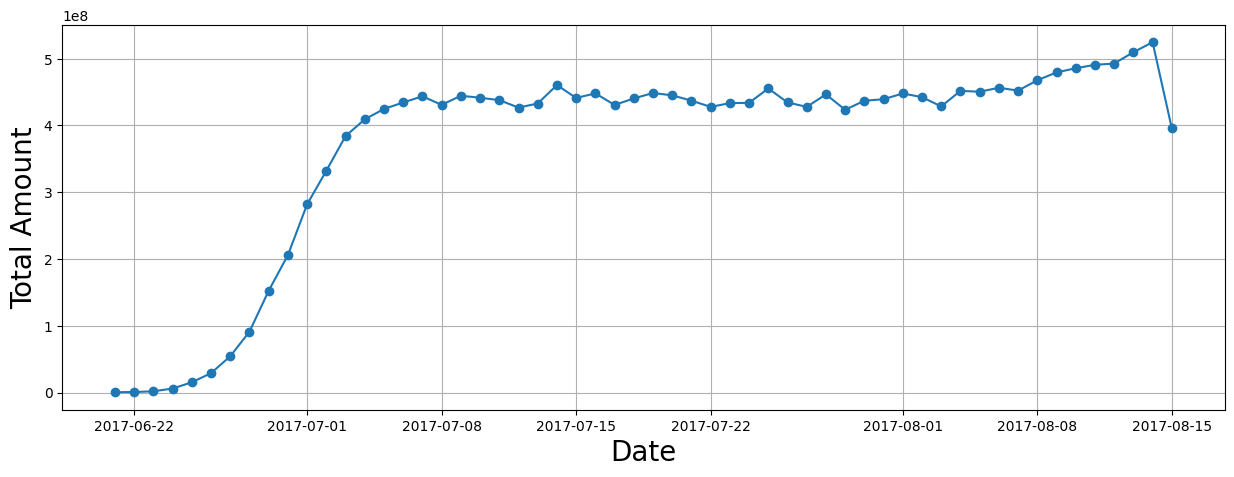

In [124]:
plt.figure(figsize=(15,5))
plt.plot(x.index,x['total_amount'],marker='o')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Amount',fontsize=20)
plt.grid('b')
plt.show()

Upon analysis of the line chart, we observe that the no. of tickets booked exhibits a gradual increase from June 22nd to July 7th with a small dip on July 8 followed by a relatively stable pattern from July 8th until August, with a noticeable peak  where the highest no. of tickets were booked on a single day. 

We can see a similar trend in total revenue earned by the company throughout the analysed time period. These findings suggest that further exploration of the factors contributing to the peak in ticket bookings may be beneficial for increasing overall revenue and optimizing operational strategies.

Calculate the average charges for each aircraft with different fare conditions.

In [130]:
df = pd.read_sql_query("""select aircraft_code,fare_conditions,round(avg(amount),2) as avg_amount from ticket_flights tf inner join flights f on tf.flight_id=f.flight_id group by aircraft_code, fare_conditions""",connection)
df

,aircraft_code,fare_conditions,avg_amount
0,319,Business,113550.56
1,319,Economy,38311.40
2,321,Business,34435.66
3,321,Economy,11534.97
4,733,Business,41865.63
5,733,Economy,13985.15
6,763,Business,82839.84
7,763,Economy,27594.72
8,773,Business,57779.91
9,773,Comfort,32740.55


<Axes: xlabel='aircraft_code', ylabel='avg_amount'>

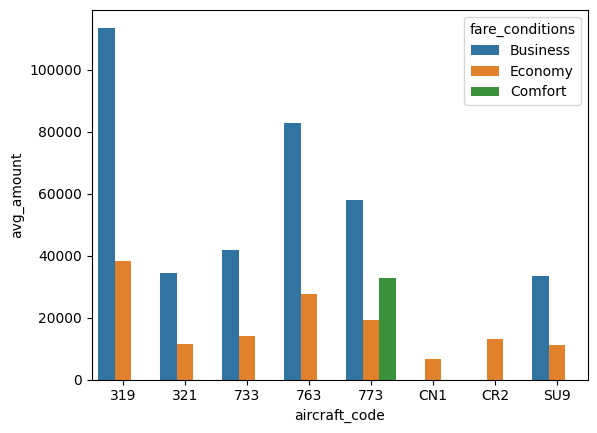

In [132]:
sns.barplot(data=df, x='aircraft_code',y='avg_amount',hue='fare_conditions')

We observe that the comfort class is only available on aircraft with code 773. Aircrafts with codes CN1 and CR2 only provide economy class. The charges for business class is consistently greater than those for economy class across all the planes.

The basic analysis of data provides insights into the no. of planes with more than 100 seats, how the no. of tickets booked and total amount earned changed over time, and the average fare for each aircraft with different fare conditions. These findings will be helpful in developing strategies to increase occupancy rates and optimize pricing for each aircraft.

# Analyzing occupancy rate

For each aircraft, calculate the total revenue per year and the average revenue per ticket.